In [10]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [37]:
file_path = '/localdata/Stats_Project/20180501_North/GLM_RAW/'
#filename = 'OR_GLM-L2-LCFA_G16_s20181400259400_e20181400300000_c20181400300029.nc'
save_path = '/localdata/Stats_Project/20180501_North/'

In [38]:
#Function that assigns the window to pull the data from as a function of time
def frames(dtime):
    if dtime < datetime.datetime(2018, 5, 1, 21, 26, 10):
        nw_lat = 40.54
        nw_lon = -98.65
        se_lat = 40.01
        se_lon = -97.98
    elif dtime > datetime.datetime(2018, 5, 1, 21, 26, 10) and dtime < datetime.datetime(2018, 5, 1, 22, 3, 10):
        nw_lat = 40.58
        nw_lon = -98.85
        se_lat = 40.27
        se_lon = -97.82
    elif dtime > datetime.datetime(2018, 5, 1, 22, 3, 10):
        nw_lat = 40.77
        nw_lon = -98.16
        se_lat = 40.44
        se_lon = -97.56
    else:
        print ('FAIL!')
        
    return nw_lat,nw_lon,se_lat,se_lon

In [39]:
#A function that takes in the file name and returns the data cut to a desired lat/lon, and the time
def load_data(nc_file):
    #Getting the time
    dtime = nc.num2date(nc_file.variables['product_time'][:],nc_file.variables['product_time'].units)
    
    #Getting the lat,lon bounds you need
    nw_lat,nw_lon,se_lat,se_lon = frames(dtime)
    
    #Loading in the data
    #data = nc_file.variables['event_energy']
    lat = nc_file.variables['event_lat'][:]
    lon = nc_file.variables['event_lon'][:]
    data = np.ones_like(lat)
    
    #Find the data that 
    data_locs = np.where((lat >= se_lat) & (lat <= nw_lat) & (lon >= nw_lon) & (lon <= se_lon))[0]
    data_cut = data[data_locs]
    lat_cut = lat[data_locs]
    lon_cut = lon[data_locs]
    
    return data_cut,lat_cut,lon_cut, dtime

In [40]:
#A function that checks for matches from the new array and total array spatially
#adds to that point if so, and then concaternates the 'null' matches
def match_maker(data,total_data,lat,total_lat,lon,total_lon):
    counter1 = np.arange(0,len(data),1) #Counter for the new data
    counter2 = np.arange(0,len(total_data),1) #Counter for total data
    rm_locs1 = np.empty([0]) #To provide the array locations that will be removed before concaternating the new and total data (no duplicate points)

    for i in counter1: #Going point by point in the new data
        for j in counter2: #Going point by point in the total data
            if (lat[i]==total_lat[j]) & (lon[i]==total_lon[j]): #Checking for matching coordinates of events/groups/flashes
                total_data[j] += data[i]
                rm_locs1 = np.append(rm_locs1,int(i))
                
    if len(rm_locs1) >= 1:            
        data = np.delete(data,rm_locs1)
        lat = np.delete(lat,rm_locs1)
        lon = np.delete(lon,rm_locs1)
        print (rm_locs1)
        
    total_data = np.concatenate((data,total_data),axis=0)
    total_lat = np.concatenate((lat,total_lat),axis=0)
    total_lon = np.concatenate((lon,total_lon),axis=0)
    return total_data,total_lat,total_lon

In [41]:
output = np.empty([0])
times = np.empty([0])

for file_name in sorted(os.listdir(file_path)):
    nc_file = nc.Dataset(file_path+file_name,'r')
    data,lat,lon,time = load_data(nc_file)
    print (time)
    seconds = time.strftime('%S')
    if seconds == '00':
        times = np.append(times,time)
        total_data = data
        total_lat = lat
        total_lon = lon
    elif seconds == '20':
        total_data,total_lat,total_lon = match_maker(data,total_data,lat,total_lat,lon,total_lon)
    elif seconds == '40':
        total_data,total_lat,total_lon = match_maker(data,total_data,lat,total_lat,lon,total_lon)
        if len(total_data) >= 1:
            output = np.append(output, np.max(total_data))
        else:
            output = np.append(output, 0)
print (output)

2018-05-01 19:59:00
2018-05-01 19:59:20
2018-05-01 19:59:40
2018-05-01 20:00:00
2018-05-01 20:00:20
2018-05-01 20:00:40
2018-05-01 20:01:00
2018-05-01 20:01:20
2018-05-01 20:01:40
2018-05-01 20:02:00
2018-05-01 20:02:20
2018-05-01 20:02:40
2018-05-01 20:03:00
2018-05-01 20:03:20
2018-05-01 20:03:40
2018-05-01 20:04:00
2018-05-01 20:04:20
2018-05-01 20:04:40
2018-05-01 20:05:00
2018-05-01 20:05:20
2018-05-01 20:05:40
2018-05-01 20:06:00
2018-05-01 20:06:20
2018-05-01 20:06:40
2018-05-01 20:07:00
2018-05-01 20:07:20
2018-05-01 20:07:40
2018-05-01 20:08:00
2018-05-01 20:08:20
2018-05-01 20:08:40
2018-05-01 20:09:00
2018-05-01 20:09:20
2018-05-01 20:09:40
2018-05-01 20:10:00
2018-05-01 20:10:20
2018-05-01 20:10:40
2018-05-01 20:11:00
2018-05-01 20:11:20
2018-05-01 20:11:40
2018-05-01 20:12:00
2018-05-01 20:12:20
2018-05-01 20:12:40
2018-05-01 20:13:00
2018-05-01 20:13:20
2018-05-01 20:13:40
2018-05-01 20:14:00
2018-05-01 20:14:20
2018-05-01 20:14:40
2018-05-01 20:15:00
2018-05-01 20:15:20


/localdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  from ipykernel import kernelapp as app
/localdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  app.launch_new_instance()
/localdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  6.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 12.]
2018-05-01 20:24:40
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
2018-05-01 20:25:00
2018-05-01 20:25:20
2018-05-01 20:25:40
2018-05-01 20:26:00
2018-05-01 20:26:20
[3. 3. 3. 3. 3.]
2018-05-01 20:26:40
[0. 1. 2. 3. 4. 5.]
2018-05-01 20:27:00
2018-05-01 20:27:20
2018-05-01 20:27:40
[ 3.  6.  8.  9. 11.]
2018-05-01 20:28:00
2018-05-01 20:28:20
2018-05-01 20:28:40
2018-05-01 20:29:00
2018-05-01 20:29:20
2018-05-01 20:29:40
2018-05-01 20:30:00
2018-05-01 20:30:20
2018-05-01 20:30:40
[0. 1. 2.]
2018-05-01 20:31:00
2018-05-01 20:31:20
2018-05-01 20:31:40
2018-05-01 20:32:00
2018-05-01 20:32:20
2018-05-01 20:32:40
2018-05-01 20:33:00
2018-05-01 20:33:20
2018-05-01 20:33:40
[4. 4. 4. 4. 4. 4. 4. 4. 4.]
2018-05-01 20:34:00
2018-05-01 20:34:20
[ 0.  3.  5.  6.  6.  6.  6.  6.

[12. 12. 12. 13. 13. 13. 15. 15. 15. 17. 17. 17. 17. 17. 17. 17. 18. 18.
 18. 18. 18. 18. 18.]
2018-05-01 21:08:00
2018-05-01 21:08:20
[ 0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2.  2.  2.  2.  2.  7.  9.
 10. 13. 14. 50. 51. 55. 57. 58. 59.]
2018-05-01 21:08:40
[0. 1. 2. 3. 4. 5. 6. 7.]
2018-05-01 21:09:00
2018-05-01 21:09:20
2018-05-01 21:09:40
[ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  9.
  9.  9.  9.  9. 13. 13. 13. 13. 13. 16. 16. 16. 16. 16.]
2018-05-01 21:10:00
2018-05-01 21:10:20
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 27. 27. 28. 30. 32.]
2018-05-01 21:10:40
[ 0.  0.  0.  0.  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4. 21. 21.
 21. 25. 25. 25.]
2018-05-01 21:11:00
2018-05-01 21:11:20
2018-05-01 21:11:40
[ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4. 17. 17. 17. 17. 17. 17. 17. 17.
 18. 18. 19. 19. 19. 19. 19. 19. 19. 19. 20. 20. 21. 21. 22. 23. 24. 25.
 26.]
2018-05-01 21:12:00
201

2018-05-01 21:34:40
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
2018-05-01 21:35:00
2018-05-01 21:35:20
[1. 1. 1.]
2018-05-01 21:35:40
[73. 73. 73. 76. 76. 76. 78. 78. 78. 81. 81. 81.]
2018-05-01 21:36:00
2018-05-01 21:36:20
2018-05-01 21:36:40
[ 3.  4.  5.  6.  7.  8. 10. 11. 13. 14. 15. 16.]
2018-05-01 21:37:00
2018-05-01 21:37:20
2018-05-01 21:37:40
2018-05-01 21:38:00
2018-05-01 21:38:20
[0. 0. 1. 1. 2. 2. 3. 3. 4. 4. 5. 5. 6. 6. 7. 8.]
2018-05-01 21:38:40
[0. 0. 1. 1.]
2018-05-01 21:39:00
2018-05-01 21:39:20
2018-05-01 21:39:40
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 3. 4.
 4. 4. 4.]
2018-05-01 21:40:00
2018-05-01 21:40:20
[ 0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  9.  9.  9

2018-05-01 21:56:40
[ 0.  0.  0.  0.  0.  1.  2.  2.  2.  3.  3.  3.  4.  4.  4.  5.  5.  5.
  6.  6.  6.  6.  6.  7.  7.  7.  8.  8.  8.  9.  9.  9. 10. 10. 10. 11.
 13. 13. 13. 15. 15. 15. 16. 16. 16. 17. 17. 17. 18. 18. 18. 19. 19. 19.
 20. 20. 20. 21. 21. 21. 22. 22. 22. 22. 23. 23. 23. 24. 24. 24. 24. 25.
 25. 25. 25. 26. 26. 26. 27. 27. 27. 27. 28. 28. 28. 28. 29. 29. 29. 29.
 30. 30. 30.]
2018-05-01 21:57:00
2018-05-01 21:57:20
[35. 35. 35. 35. 35. 35. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 37.
 37. 37. 37. 37. 37.]
2018-05-01 21:57:40
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  8.  9.  9.  9.  9.  9.  9. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 11. 12. 13. 13. 13. 13. 13. 13. 14. 14.
 14. 14. 14. 14. 15. 15. 15. 15. 15. 15. 16. 16. 16. 16. 16. 16. 17. 18.
 18. 18. 18. 18. 18. 19. 19. 19. 19. 19. 19. 20. 20. 20. 20. 20. 20. 22.
 22. 22.

[  0.   1.   2.   3.   4.   5.   6.   8.   9.  11.  12.  14.  15.  16.
  18.  19.  22.  23.  26.  28.  31.  32.  34.  38.  41.  42.  55.  56.
  61.  64.  69.  72.  76.  77.  81.  83.  88.  89.  91.  93. 101. 112.
 113. 124. 126. 142. 143. 144. 144. 144. 144. 144. 144. 144. 144. 144.
 144. 144. 144. 144. 144. 144. 144. 145. 145. 146. 147. 147. 147. 147.
 147. 148. 148. 148. 148. 148. 149. 149. 149. 149. 149. 150. 150. 150.
 150. 150. 151. 151. 151. 151. 151. 152. 152. 152. 152. 152. 153. 153.
 153. 153. 153. 154. 154. 154. 154. 154. 155. 155. 156. 156. 157. 157.
 157. 157. 157. 158. 158. 158. 158. 158. 158. 158. 158. 158. 158. 158.
 158. 158. 158. 158. 158. 159. 159. 160. 161. 161. 161. 161. 161. 162.
 162. 163. 165. 165. 166. 166. 166. 166. 166. 167. 167. 168. 168. 168.
 168. 168. 169. 169. 170. 170. 170. 170. 170. 171. 171. 171. 171. 171.
 172. 172. 173. 173. 173. 173. 173. 173. 173. 173. 173. 173. 173. 173.
 173. 173. 173. 173. 174. 175. 176. 176. 176. 176. 176. 176. 176. 176.
 176. 

2018-05-01 22:29:00
2018-05-01 22:29:20
2018-05-01 22:29:40
[0. 0. 0. 3. 3. 3. 5. 5. 5. 6. 6. 6.]
2018-05-01 22:30:00
2018-05-01 22:30:20
2018-05-01 22:30:40
2018-05-01 22:31:00
2018-05-01 22:31:20
2018-05-01 22:31:40
2018-05-01 22:32:00
2018-05-01 22:32:20
[4. 4. 5. 5.]
2018-05-01 22:32:40
2018-05-01 22:33:00
2018-05-01 22:33:20
2018-05-01 22:33:40
[0. 0. 0. 0. 1. 1. 1. 1. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
2018-05-01 22:34:00
2018-05-01 22:34:20
2018-05-01 22:34:40
2018-05-01 22:35:00
2018-05-01 22:35:20
2018-05-01 22:35:40
2018-05-01 22:36:00
2018-05-01 22:36:20
[5. 5.]
2018-05-01 22:36:40
2018-05-01 22:37:00
2018-05-01 22:37:20
2018-05-01 22:37:40
2018-05-01 22:38:00
2018-05-01 22:38:20
2018-05-01 22:38:40
2018-05-01 22:39:00
2018-05-01 22:39:20
2018-05-01 22:39:40
2018-05-01 22:40:00
2018-05-01 22:40:20
2018-05-01 22:40:40
2018-05-01 22:41:00
2018-05-01 22:41:20
2018-05-01 22:41:40
2018-05-01 22:42:00
2018-05-01 22:42:20
2018-05-01 22:42:40
2018-05-01 22:43:00
2018-05-0

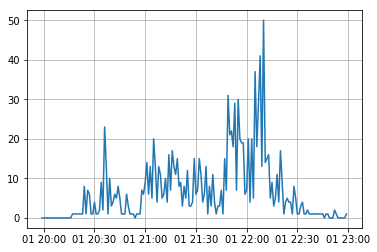

In [42]:
plt.plot(times,output)
plt.grid(True)
plt.show()

In [23]:
print (times)

[datetime.datetime(2019, 4, 3, 21, 29, 40)
 datetime.datetime(2019, 4, 3, 21, 30, 40)
 datetime.datetime(2019, 4, 3, 21, 31, 40)
 datetime.datetime(2019, 4, 3, 21, 32, 40)
 datetime.datetime(2019, 4, 3, 21, 33, 40)
 datetime.datetime(2019, 4, 3, 21, 34, 40)
 datetime.datetime(2019, 4, 3, 21, 35, 40)
 datetime.datetime(2019, 4, 3, 21, 36, 40)
 datetime.datetime(2019, 4, 3, 21, 37, 40)
 datetime.datetime(2019, 4, 3, 21, 38, 40)
 datetime.datetime(2019, 4, 3, 21, 39, 40)
 datetime.datetime(2019, 4, 3, 21, 40, 40)
 datetime.datetime(2019, 4, 3, 21, 41, 40)
 datetime.datetime(2019, 4, 3, 21, 42, 40)
 datetime.datetime(2019, 4, 3, 21, 43, 40)
 datetime.datetime(2019, 4, 3, 21, 44, 40)
 datetime.datetime(2019, 4, 3, 21, 45, 40)
 datetime.datetime(2019, 4, 3, 21, 46, 40)
 datetime.datetime(2019, 4, 3, 21, 47, 40)
 datetime.datetime(2019, 4, 3, 21, 48, 40)
 datetime.datetime(2019, 4, 3, 21, 49, 40)
 datetime.datetime(2019, 4, 3, 21, 50, 40)
 datetime.datetime(2019, 4, 3, 21, 51, 40)
 datetime.d

In [43]:
np.savetxt(save_path+'GLM_RAW_Event_Density.txt',output)

In [35]:
print (nc_file.variables['product_time'].units)

print (nc_file.variables['goes_lat_lon_projection'])

seconds since 2000-01-01 12:00:00
<class 'netCDF4._netCDF4.Variable'>
int32 goes_lat_lon_projection()
    long_name: GOES-R latitude / longitude projection
    grid_mapping_name: latitude_longitude
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    longitude_of_prime_meridian: 0.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used



In [33]:
datetime.datetime.utcfromtimestamp(nc_file.variables['product_time'][:])

datetime.datetime(1988, 5, 19, 14, 59, 40)

In [14]:
nc_file.variables['event_count'][:].shape

()

In [9]:
nc_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    created_by: inge GLM GRB-R v1.0.0 grbgamma.ssec.wisc.edu
    production_site: WCDAS
    featureType: point
    orbital_slot: GOES-East
    platform_ID: G16
    dataset_name: OR_GLM-L2-LCFA_G16_s20181400400000_e20181400400200_c20181400400225.nc
    naming_authority: gov.nesdis.noaa
    institution: DOC/NOAA/NESDIS> U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    iso_series_metadata_id: f5816f53-fd6d-11e3-a3ac-0800200c9a66
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    standard_name_vocabulary: CF Standard Name Table (v25, 05 July 2013)
    title: GLM L2 Lightning Detections: Events, Groups, and Flashes
    summary: The Lightning Detections: Events, Groups, and F

In [18]:
print (nc_file.variables['event_id'][:])

[656107858 656107859 656107861 ... 656126920 656126921 656126922]


(18895,)


(18895,)